## Prophet Model

22:04:07 - cmdstanpy - INFO - Chain [1] start processing
22:04:08 - cmdstanpy - INFO - Chain [1] done processing


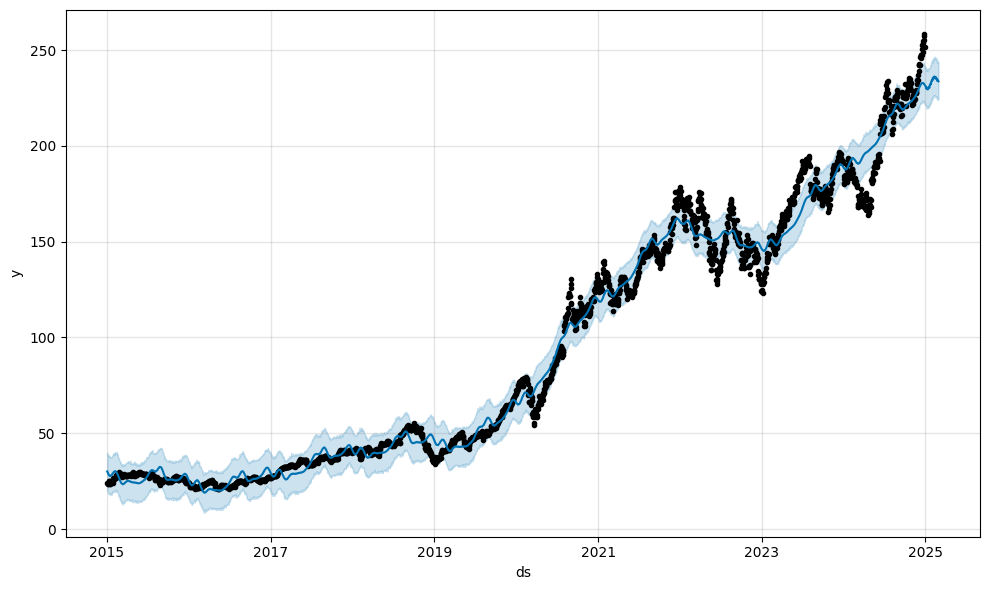

Prophet predictions saved to 'Models/prophet_predictions.csv'


In [ ]:
# Import libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os  # for creating directory

# Load CSV 
df = pd.read_csv(r"C:\Users\bollejayanthsriteja\OneDrive\Desktop\Time Series Analysis and Forecasting for Stock Market\AAPL_clean.csv")

# Drop rows with "AAPL" in them or force only date+close columns
df = df[['Date', 'Close']]
df = df[df['Date'] != 'AAPL'] 

# Convert columns to correct format
df['ds'] = pd.to_datetime(df['Date'], errors='coerce')
df['y'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop rows with missing data
df.dropna(subset=['ds', 'y'], inplace=True)

# Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df[['ds', 'y']])

# Predict 60 days ahead
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

# Save predictions to Models/prophet_predictions.csv
os.makedirs("Models", exist_ok=True)
prophet_output = forecast[['ds', 'yhat']].copy()
prophet_output['Actual'] = df.set_index('ds').reindex(forecast['ds'])['y'].values
prophet_output.rename(columns={'ds': 'Date', 'yhat': 'Forecast'}, inplace=True)
prophet_output.to_csv("Models/prophet_predictions.csv", index=False)
print("Prophet predictions saved to 'Models/prophet_predictions.csv'")